# Factors Influencing Life Expectancy using **Linear Regression**


## Problem:

**The data-set aims to answer the following key questions:**

- Does various predicting factors really affect the Life expectancy?
- What are the predicting variables actually affecting the life expectancy?
- Should a country having a lower life expectancy value increase its health care expenditure in order to improve its average lifespan?
- Do Infant and Adult mortality rates affect life expectancy?
- Does Life Expectancy has positive or negative correlation with a country's status (developing or developed), lifestyle, GDP,  etc.
- What is the impact of schooling on the lifespan of humans?
- Does Life Expectancy have positive or negative relationship with drinking alcohol?
- What is the impact of Immunization coverage (for various disease like Measles,Hepatitis B) on life Expectancy?


## Attribute Information:

- Country: Country
- Year: Year
- Status: Developed or Developing status
- Life expectancy: Life Expectancy in age
- Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in liters of pure alcohol)
- percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: Measles - number of reported cases per 1000 population
- BMI: Average Body Mass Index of entire population
- under-five deaths: Number of under-five deaths per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- thinness  1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)



In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
data = pd.read_csv("Life Expectancy Data.csv") 

In [3]:
df = data.copy()
df.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   Thinness  1-19 years  Thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [4]:
df.shape

(2938, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.columns = [col.replace(' ','_') for col in df.columns]
df.columns = [col.replace('/','_') for col in df.columns]
df.columns = [col.replace('-','_') for col in df.columns]

In [7]:
# check for missing values
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
Thinness__1_19_years                34
Thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [8]:
# treat missing numerical values with medians

medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

In [9]:
# Check the unique values in each column of the dataframe.
df.nunique()

Country                             193
Year                                 16
Status                                2
Life_expectancy                     362
Adult_Mortality                     425
Infant_deaths                       209
Alcohol                            1077
Percentage_expenditure             2328
Hepatitis_B                          87
Measles                             958
BMI                                 608
Under_five_deaths                   252
Polio                                73
Total_expenditure                   819
Diphtheria                           81
HIV_AIDS                            200
GDP                                2491
Population                         2279
Thinness__1_19_years                200
Thinness_5_9_years                  207
Income_composition_of_resources     625
Schooling                           173
dtype: int64

In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits

df.describe(include='all').T

count unique         top  freq  \
Country                             2938    193        Cuba    16   
Year                            2938.000    NaN         NaN   NaN   
Status                              2938      2  Developing  2426   
Life_expectancy                 2938.000    NaN         NaN   NaN   
Adult_Mortality                 2938.000    NaN         NaN   NaN   
Infant_deaths                   2938.000    NaN         NaN   NaN   
Alcohol                         2938.000    NaN         NaN   NaN   
Percentage_expenditure          2938.000    NaN         NaN   NaN   
Hepatitis_B                     2938.000    NaN         NaN   NaN   
Measles                         2938.000    NaN         NaN   NaN   
BMI                             2938.000    NaN         NaN   NaN   
Under_five_deaths               2938.000    NaN         NaN   NaN   
Polio                           2938.000    NaN         NaN   NaN   
Total_expenditure               2938.000    NaN         NaN   NaN   
Diphtheria                      2938.000    NaN         NaN   NaN   
HIV_AIDS                        2938.000    NaN         NaN   NaN   
GDP                             2938.000    NaN         NaN   NaN   
Population                      2938.000    NaN         NaN   NaN   
Thinness__1_19_years            2938.000    NaN         NaN   NaN   
Thinness_5_9_years              2938.000    NaN         NaN   NaN   
Income_composition_of_resources 2938.000    NaN         NaN   NaN   
Schooling                       2938.000    NaN         NaN   NaN   

                                        mean          std      min        25%  \
Country                                  NaN          NaN      NaN        NaN   
Year                                2007.519        4.614 2000.000   2004.000   
Status                                   NaN          NaN      NaN        NaN   
Life_expectancy                       69.235        9.509   36.300     63.200   
Adult_Mortality                      164.726      124.086    1.000     74.000   
Infant_deaths                         30.304      117.927    0.000      0.000   
Alcohol                                4.547        3.922    0.010      1.093   
Percentage_expenditure               738.251     1987.915    0.000      4.685   
Hepatitis_B                           83.022       22.997    1.000     82.000   
Measles                             2419.592    11467.272    0.000      0.000   
BMI                                   38.381       19.935    1.000     19.400   
Under_five_deaths                     42.036      160.446    0.000      0.000   
Polio                                 82.618       23.367    3.000     78.000   
Total_expenditure                      5.924        2.401    0.370      4.370   
Diphtheria                            82.393       23.656    2.000     78.000   
HIV_AIDS                               1.742        5.078    0.100      0.100   
GDP                                 6611.524    13296.603    1.681    580.487   
Population                      10230851.228 54022417.455   34.000 418917.250   
Thinness__1_19_years                   4.822        4.398    0.100      1.600   
Thinness_5_9_years                     4.852        4.486    0.100      1.600   
Income_composition_of_resources        0.630        0.205    0.000      0.504   
Schooling                             12.010        3.265    0.000     10.300   

                                        50%         75%            max  
Country                                 NaN         NaN            NaN  
Year                               2008.000    2012.000       2015.000  
Status                                  NaN         NaN            NaN  
Life_expectancy                      72.100      75.600         89.000  
Adult_Mortality                     144.000     227.000        723.000  
Infant_deaths                         3.000      22.000       1800.000  
Alcohol                               3.755       7.390         17.870  

In [11]:
# visualize uni-veriate variables to gain insight of their central tendency
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig 
    bins: number of bins (default None)
    """
    sns.set(font_scale=2) 
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') 
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

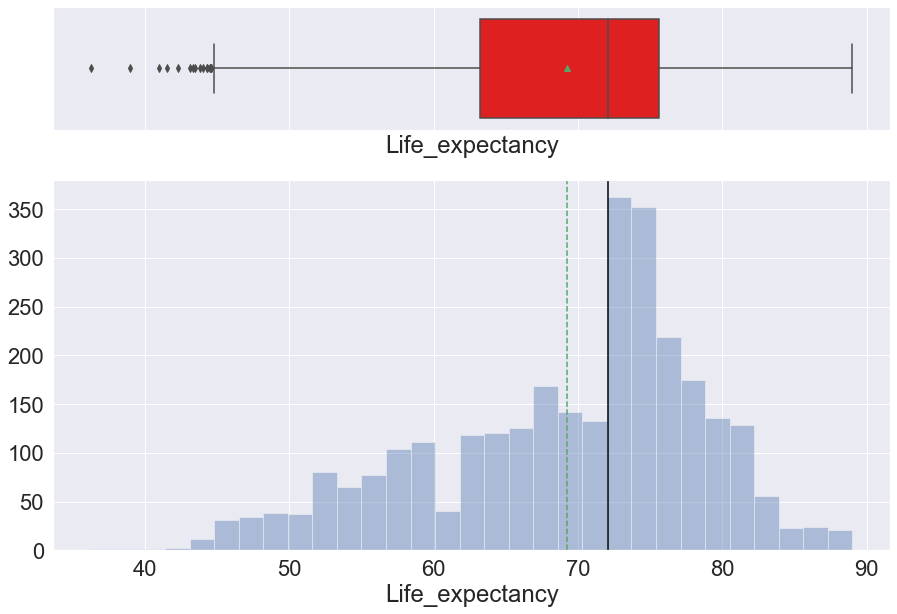

In [12]:
histogram_boxplot(df.Life_expectancy)

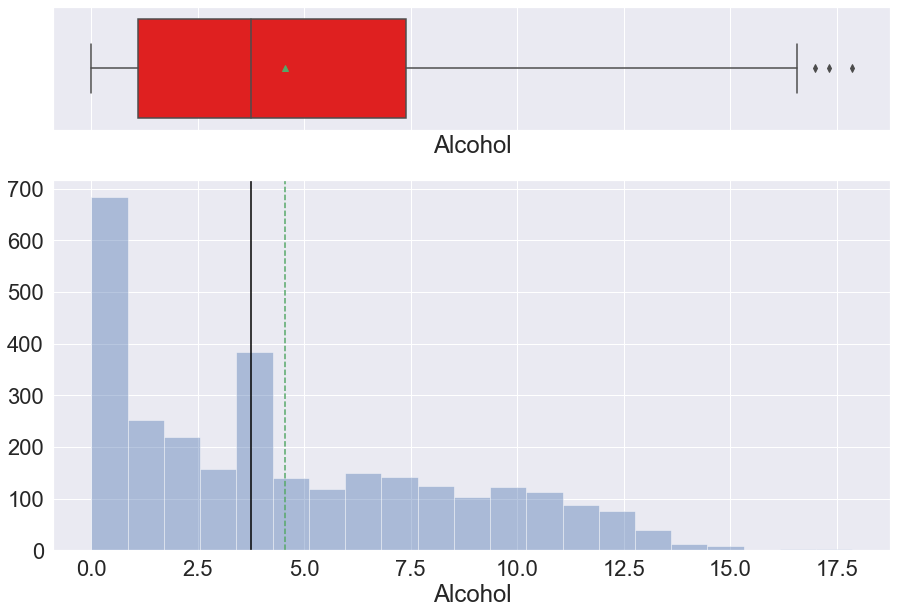

In [13]:

histogram_boxplot(df.Alcohol)

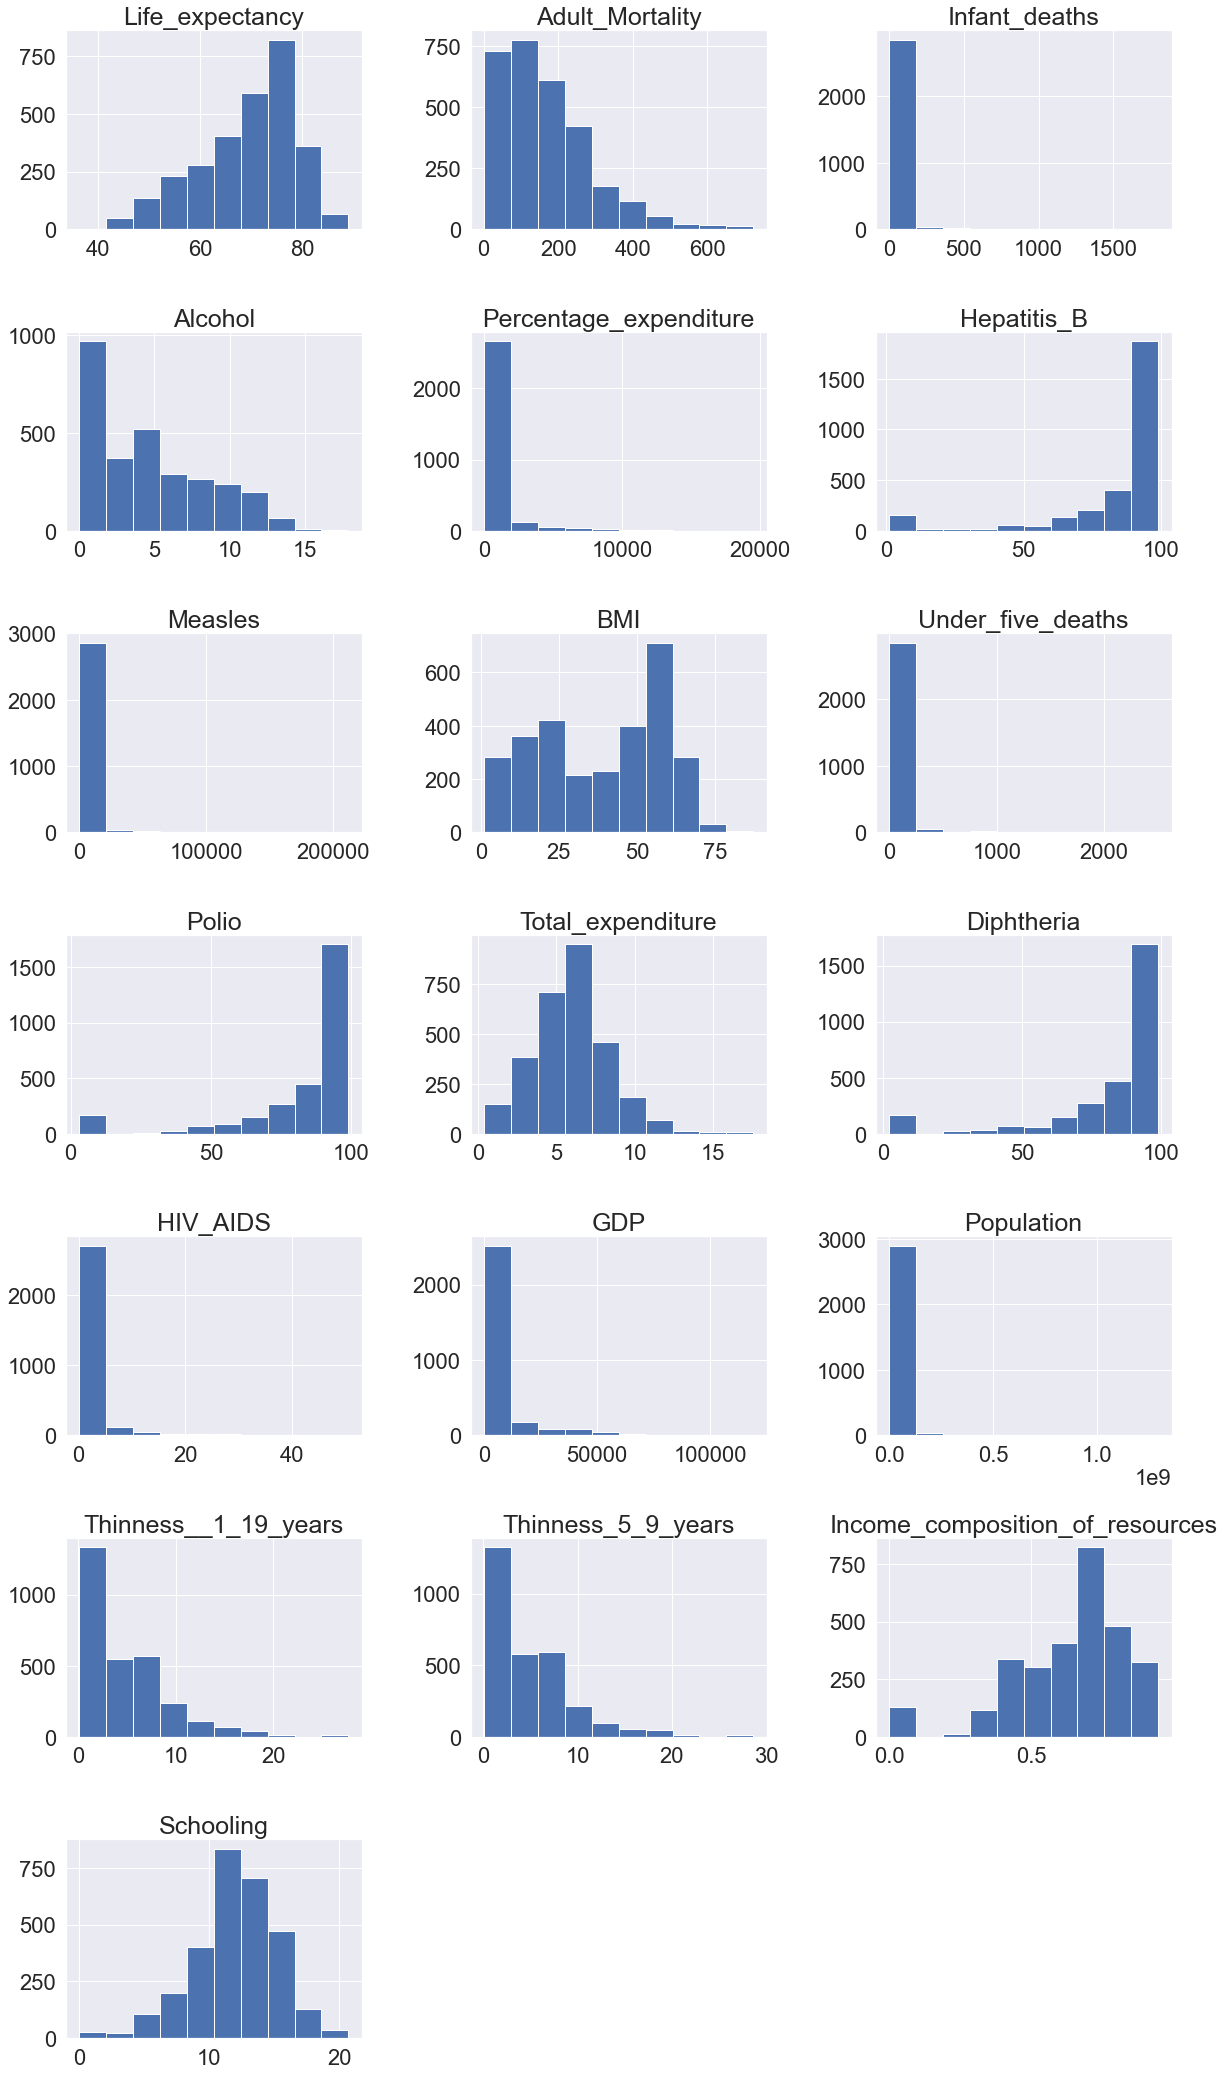

In [14]:
# plot histogram of all plots
all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove('Year')
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)

plt.show()

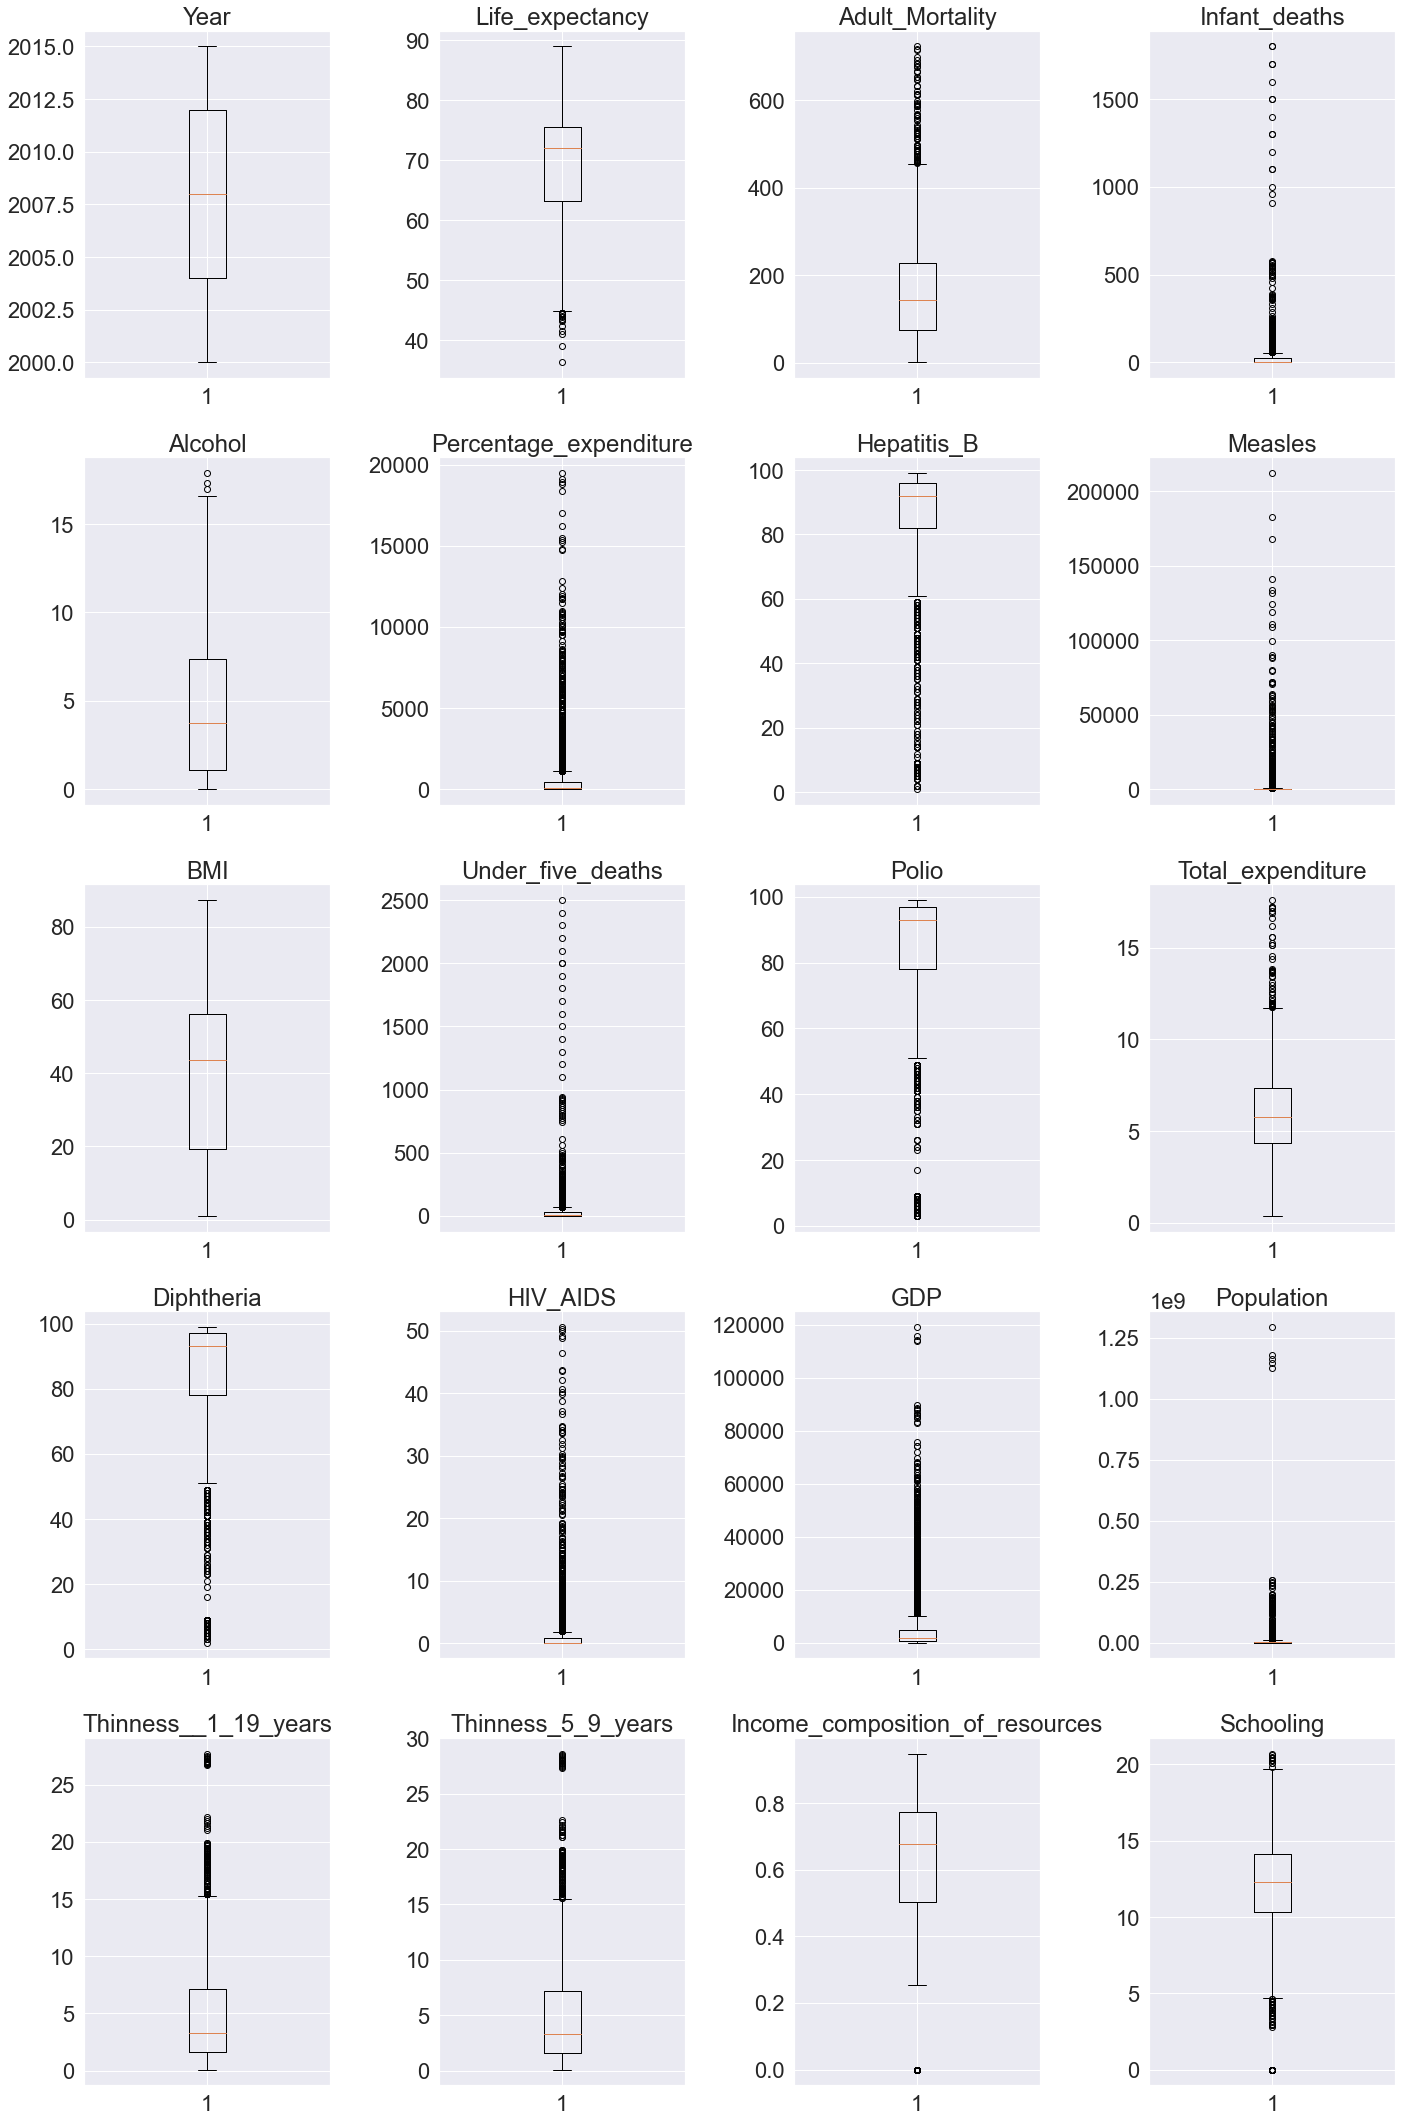

In [15]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [16]:
# group coutries into continents
! pip install pycountry-convert
import pycountry_convert as pc

def country_to_continent(country_name):
    '''
    country_name : name of country for which continent is needed
    '''
    if '(' in country_name:
        country_name = country_name.split(' ')[0]
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [17]:
loc = df.Country.tolist()
continent = dict()
# hard coding the continent of those countries which was giving error with country_to_continent function
for cn in loc:
    if cn == 'Republic of Korea':
        continent[cn] = 'Asia'
    elif cn == 'The former Yugoslav republic of Macedonia':
        continent[cn] = 'Europe'
    elif cn == 'Timor-Leste':
        continent[cn] = 'Asia'
    else:
        continent[cn] = country_to_continent(cn)


In [18]:
# mapping every country to its continent
df['Continent'] = df['Country'].map(continent)

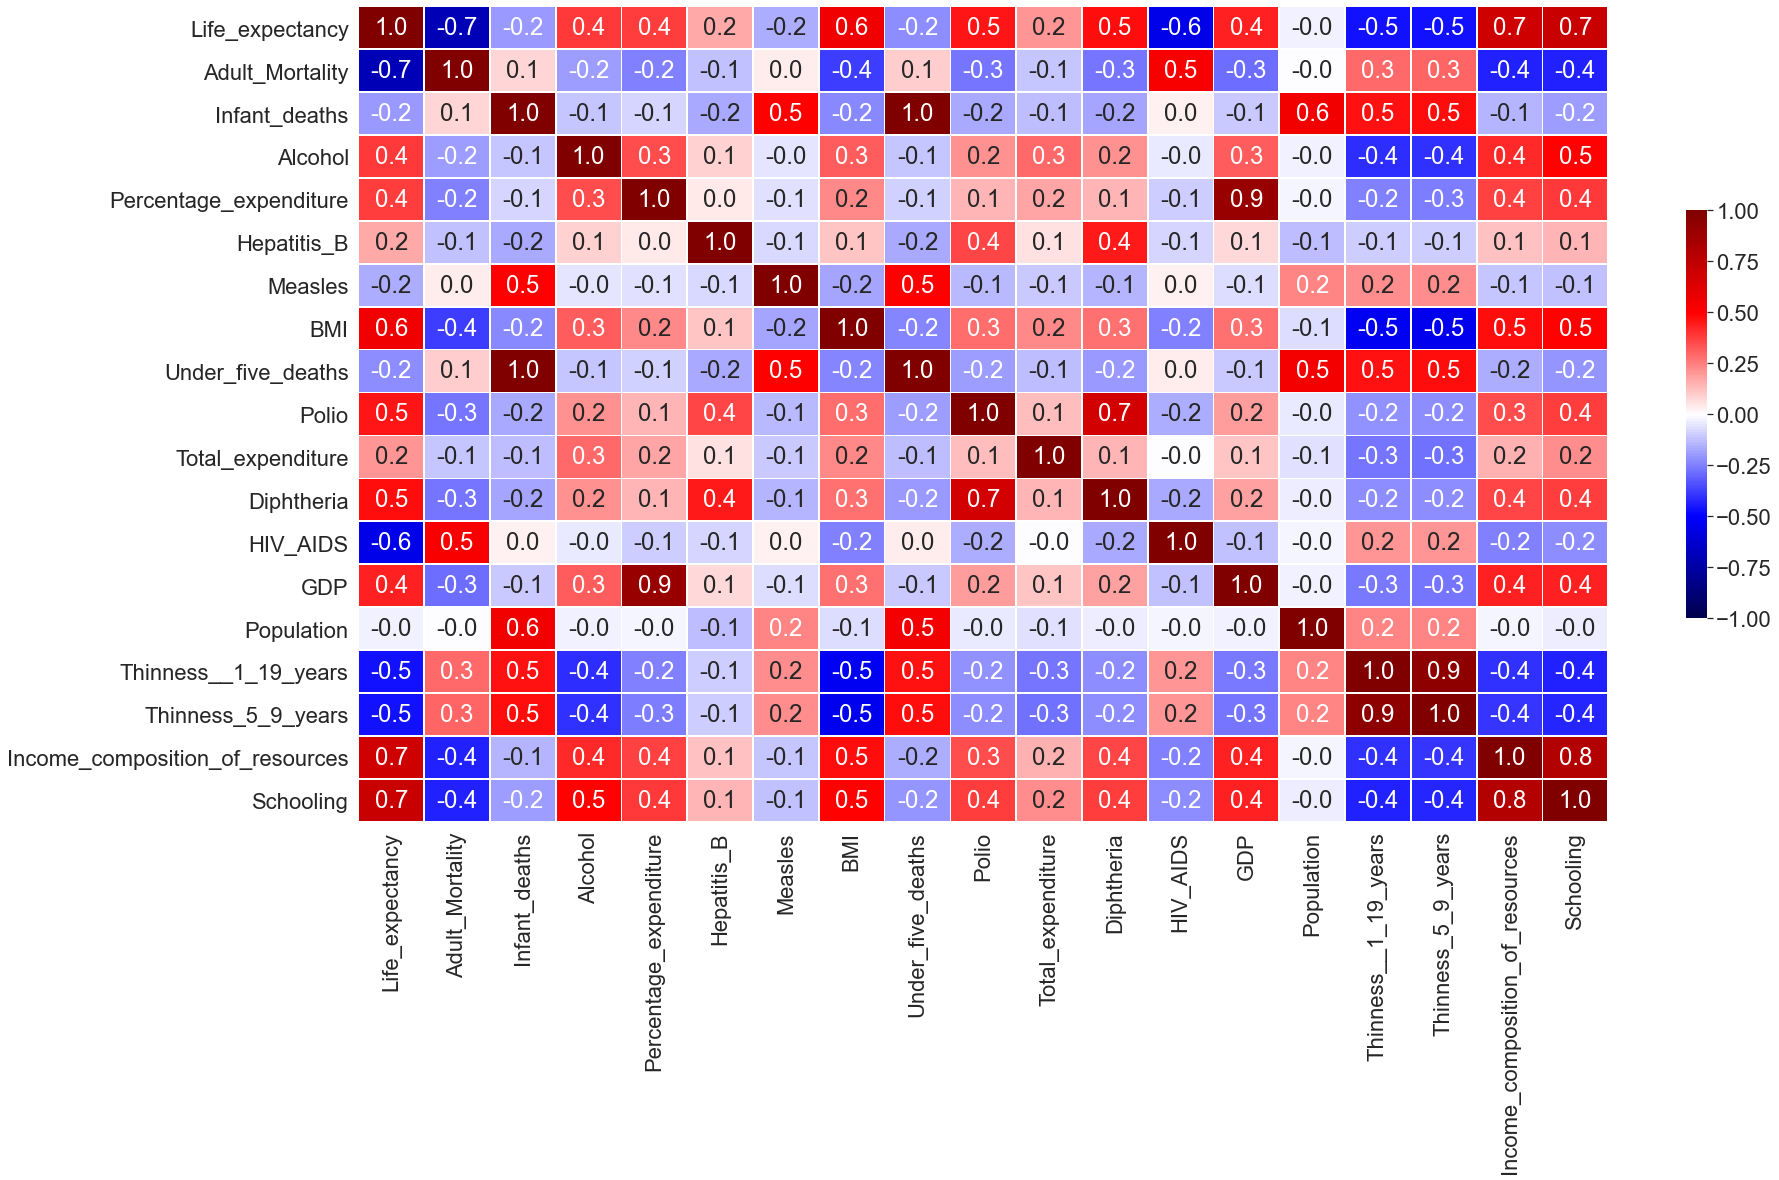

In [19]:
# look at correlations

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('Year') # dropping year column as it is temporal variable
corr = df[numeric_columns].corr() 

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

**Observations**
* Life expectancy is highly negatively correlated with Adult Mortality, HIV AIDs, which means that 
  as adult mortality and HIV death (0-4 years) increases, life expectancy of countries tend to decrease
* Life expectancy is highly positively correlated with Schooling, Income_composition of resources and BMI which means that 
  as schooling years of citizens in a country , income composition of resources and bmi increases life expectancy tend to         increase 


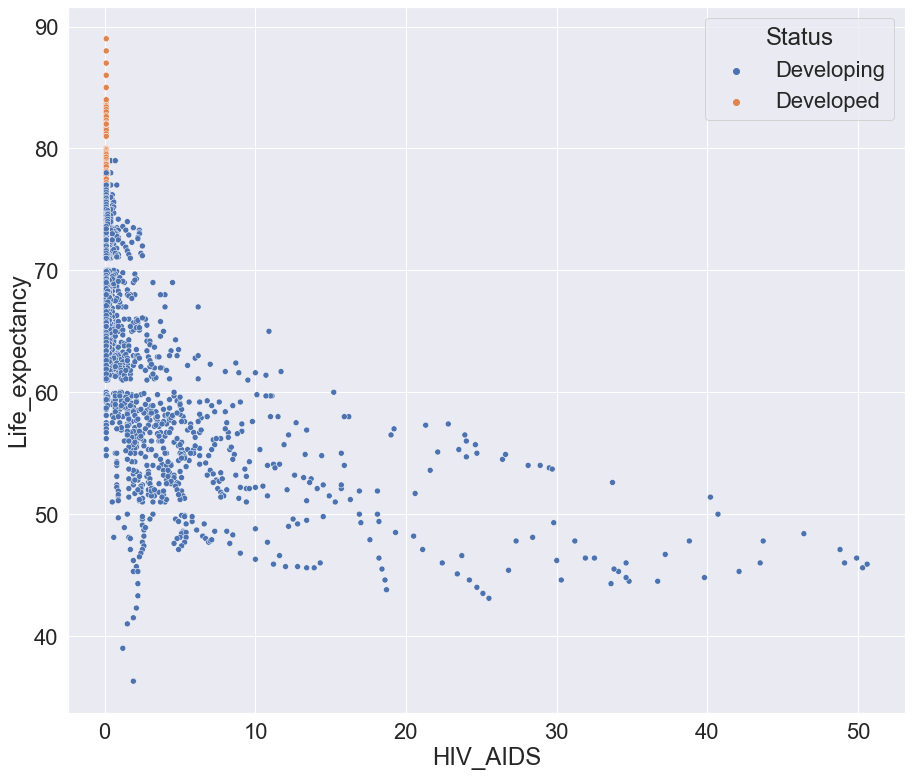

In [20]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Life_expectancy', x='HIV_AIDS', hue='Status', data=df);

* data points from developed countries indicate that they have very low cases of HIV AIDs and higher life expectancy

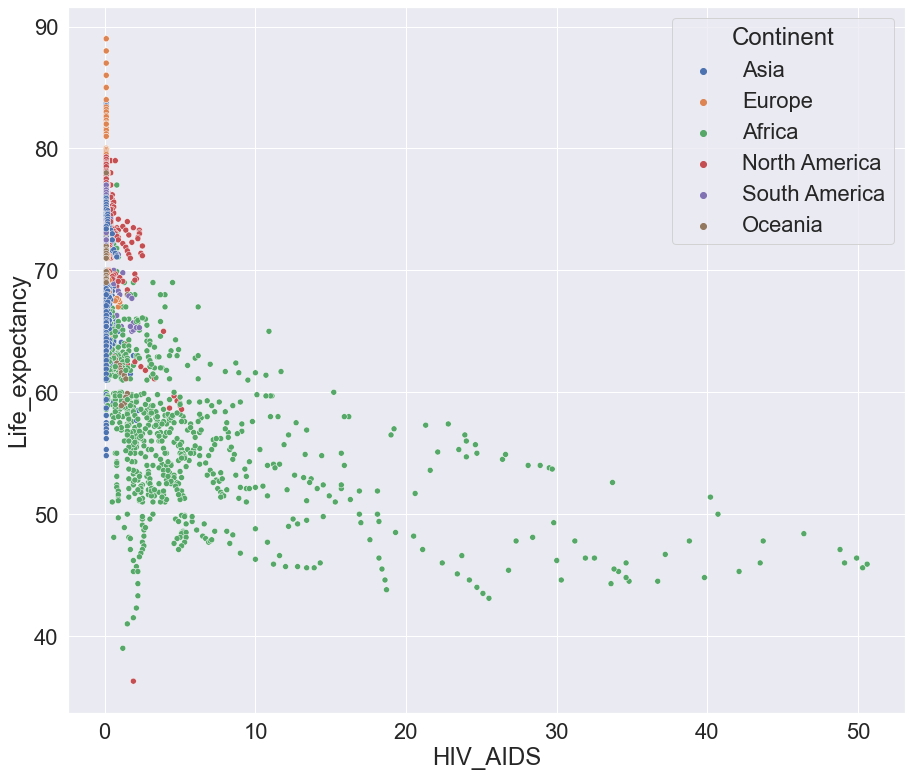

In [21]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Life_expectancy', x='HIV_AIDS', hue='Continent', data=df);

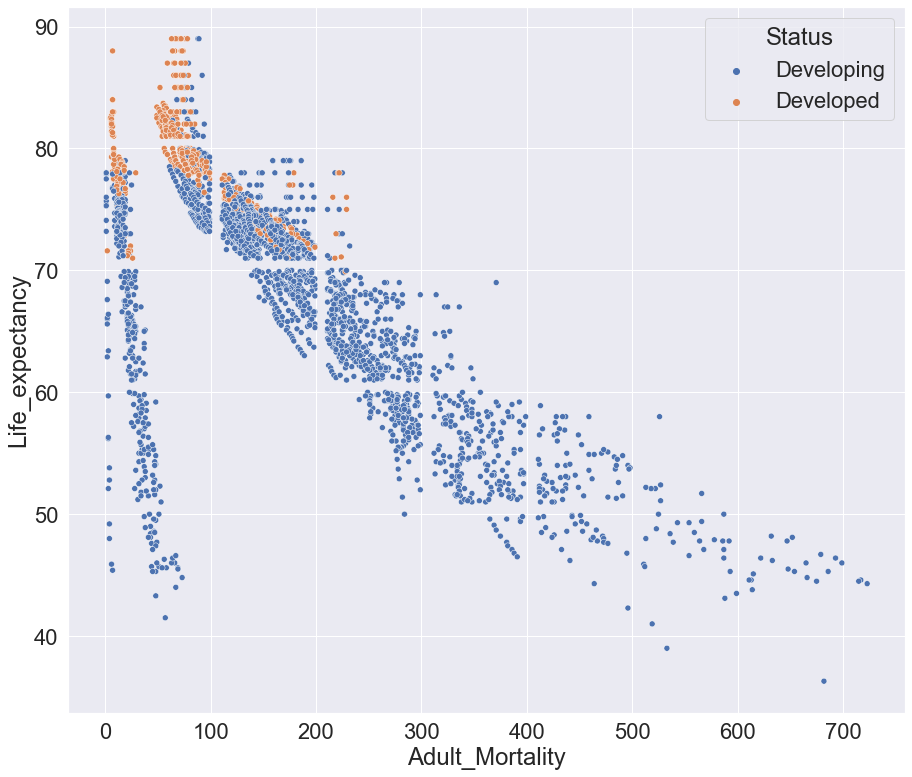

In [22]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Life_expectancy', x='Adult_Mortality', hue='Status', data=df);

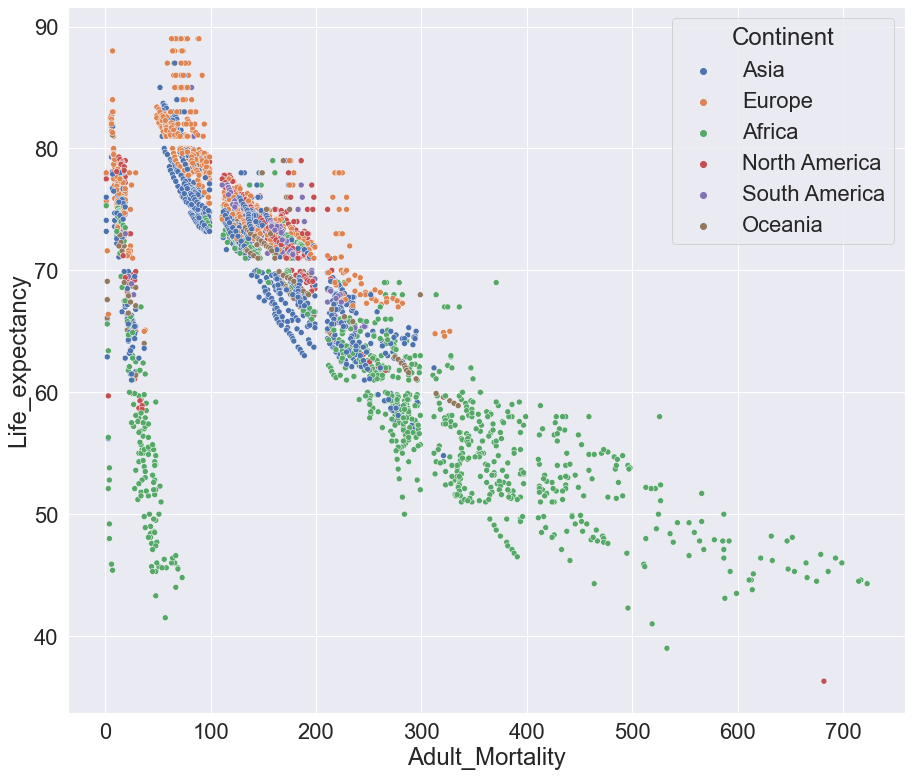

In [23]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Life_expectancy', x='Adult_Mortality', hue='Continent', data=df);

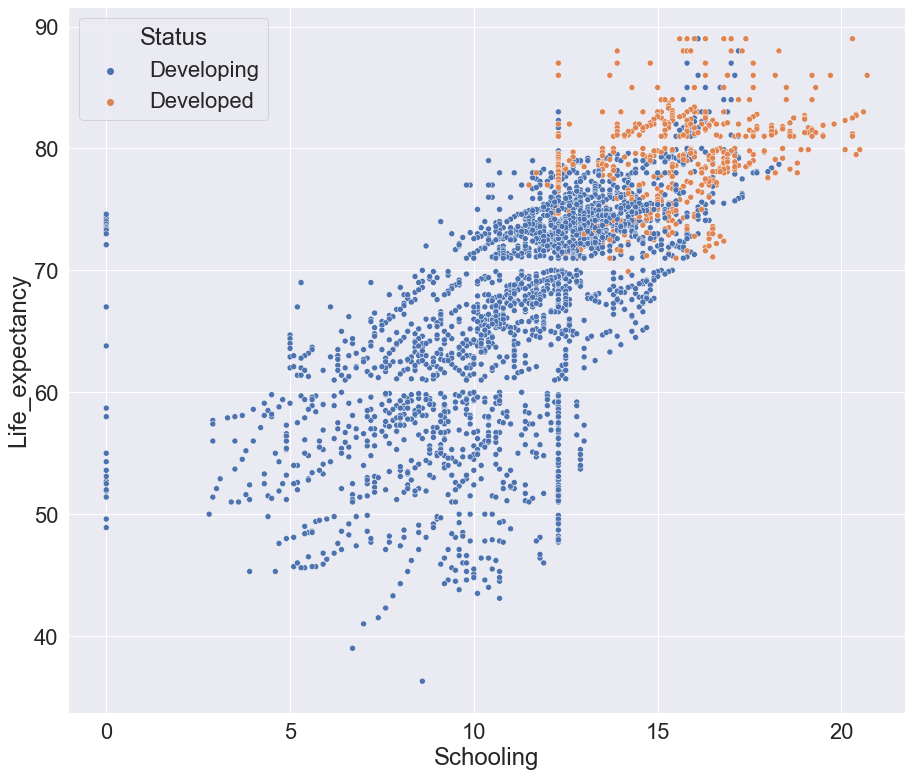

In [24]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Life_expectancy', x='Schooling', hue='Status', data=df);

* Majority of Developed countries have schooling of more than 13 years
* Developing countries have higher variance in schooling years

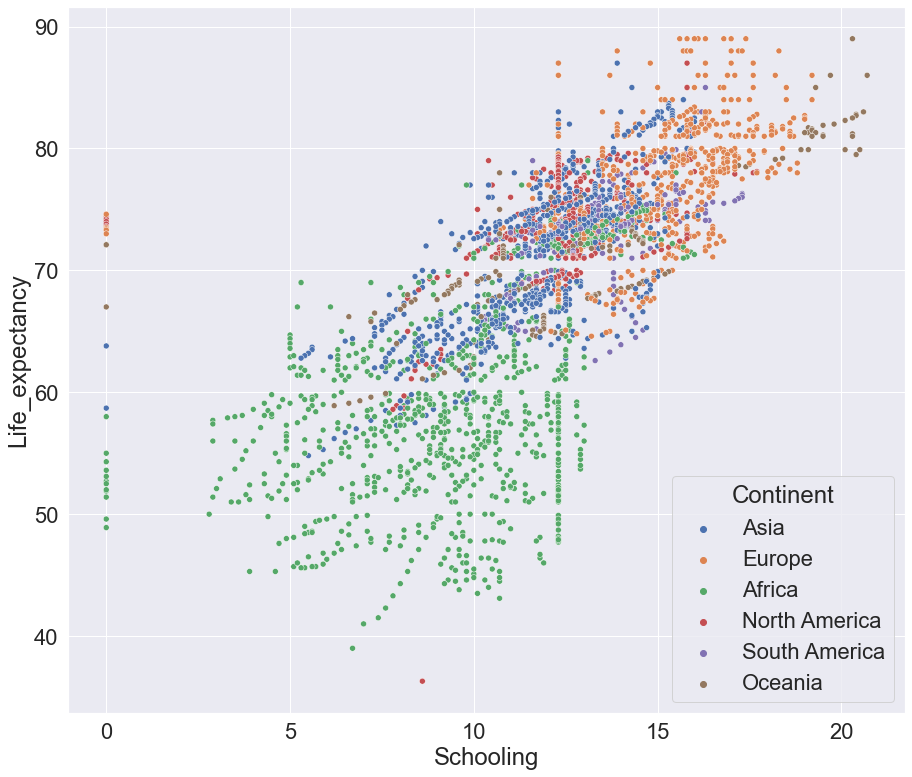

In [25]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Life_expectancy', x='Schooling', hue='Continent', data=df);

* Majority of Europian countries ,  Some of Oceania countries have schooling years more than 15 years
* African countries have lower Schooling years
* Some observation have 0 schooling years which we can explore further

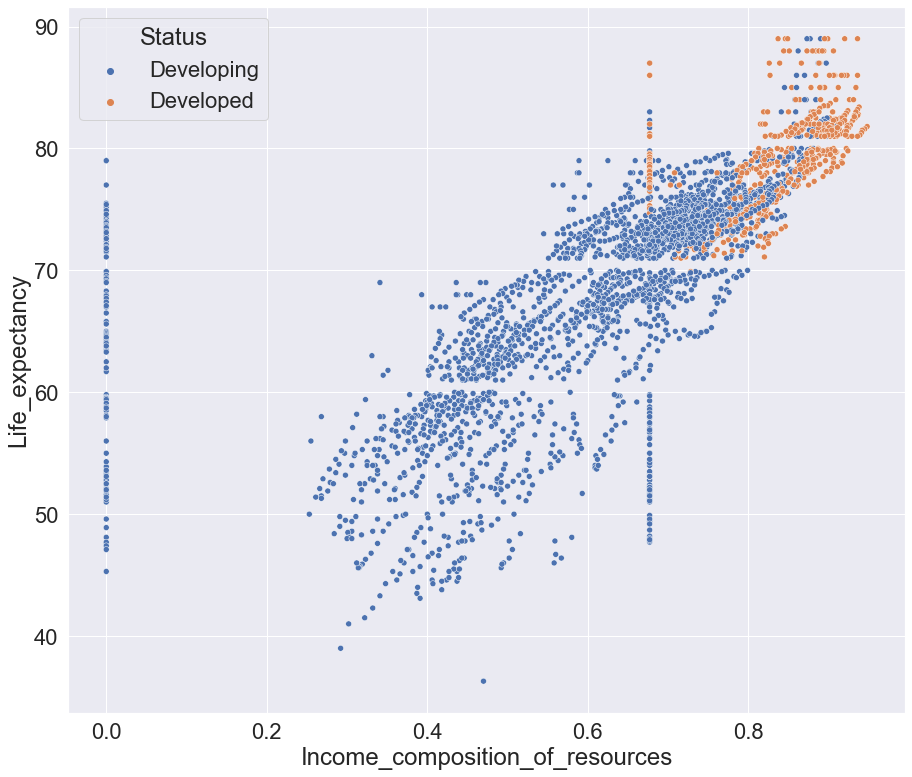

In [26]:
plt.figure(figsize=(15,13))

sns.scatterplot(y='Life_expectancy', x='Income_composition_of_resources', hue='Status', data=df);

* Developed countries have higher Income composition of resources. 
* There are two data lines in the dataset. This might indicate -
 - Income_composition data is not present for some data points(0)
 - Income _composition did not change for for a country with an increase in the life expectancy. 
 - We need more domain knowledge to fix this and you can try it out yourself and we will not treat the same in this exercise.


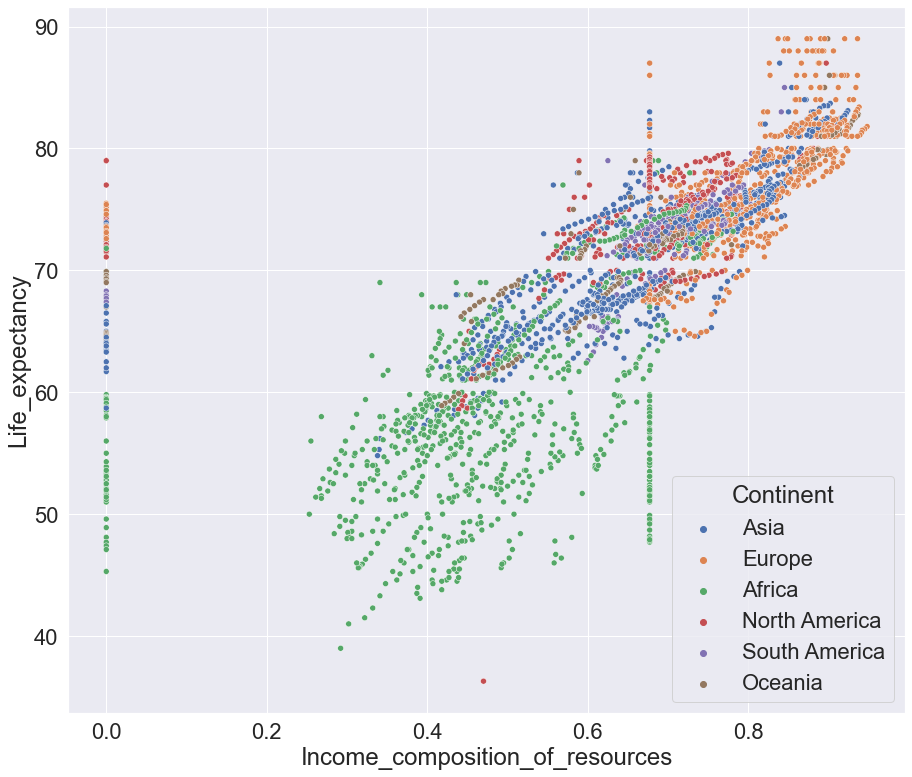

In [27]:
plt.figure(figsize=(15,13))

sns.scatterplot(y='Life_expectancy', x='Income_composition_of_resources', hue='Continent', data=df);

* African countries having lower life expectancy have low income composition of resources

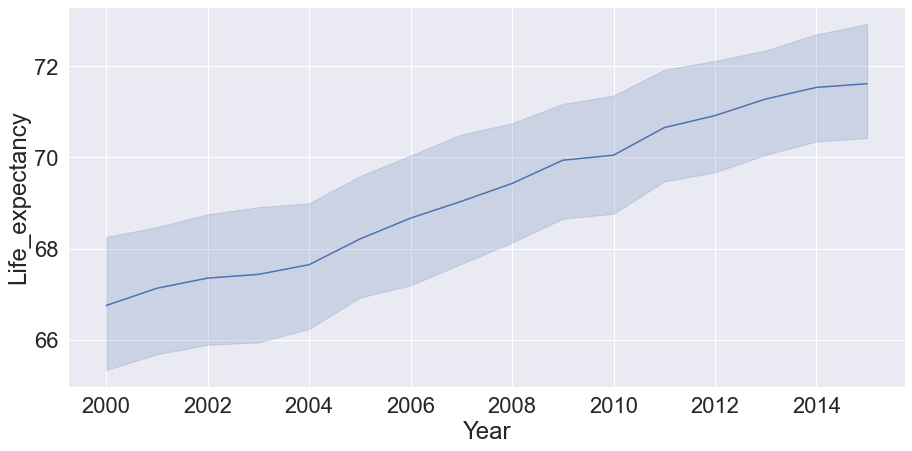

In [28]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Life_expectancy',
             data=df);


* Overall life expectancy of the world population is increasing  with time ( years )

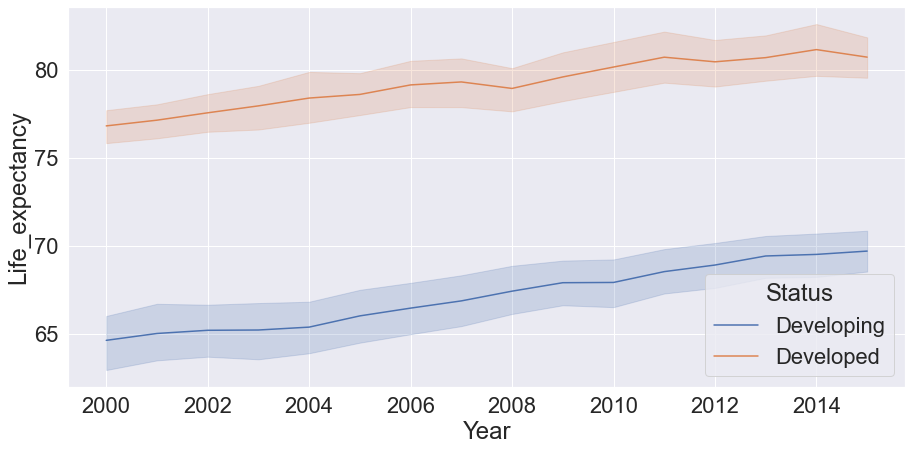

In [29]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Life_expectancy',hue='Status',
             data=df);

* In both developing countries and developed countries life expectancy has been increasing over the years
* Developing countries have lower life expectancy than developed countries

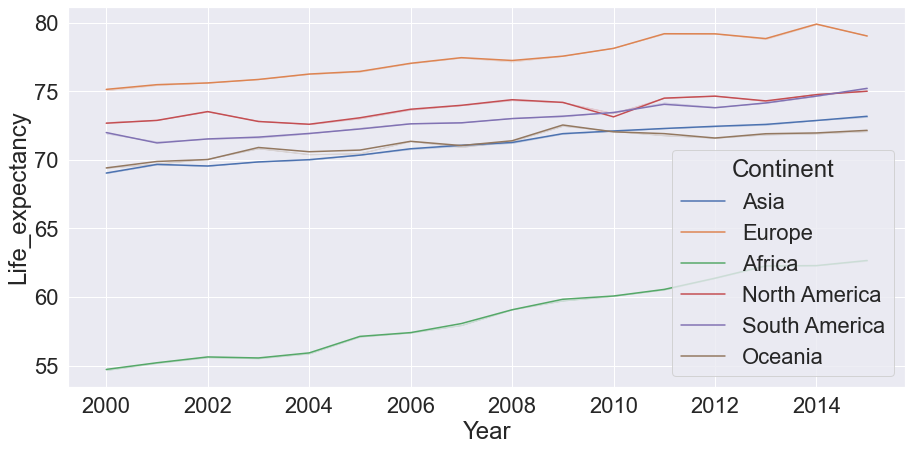

In [30]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Life_expectancy',hue='Continent',ci=0,
             data=df);

* African countries have lower life expectancy than other countries but its slope of increase in life expectancy is higher than all other continents

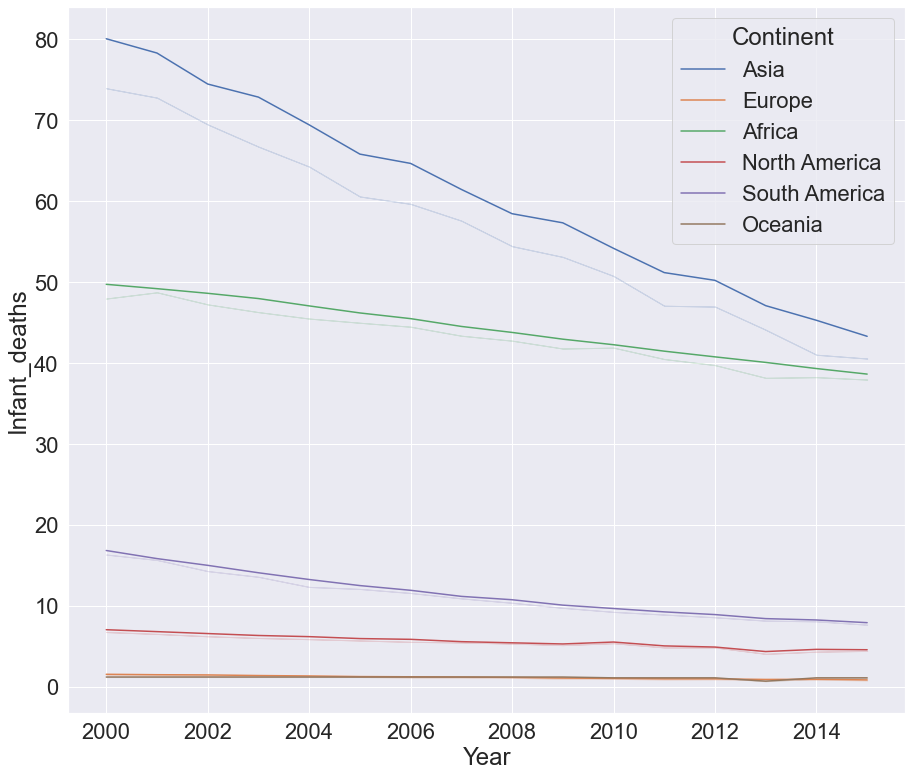

In [31]:
plt.figure(figsize=(15,13))
sns.lineplot(x='Year', y='Infant_deaths',hue='Continent',ci=0,
             data=df);

* Asian Countries have witnessed sharp decline in infants deaths
* In African countries also infants death have decreased over the years
* European , North American and Oceanic countries already had very lower infants deaths

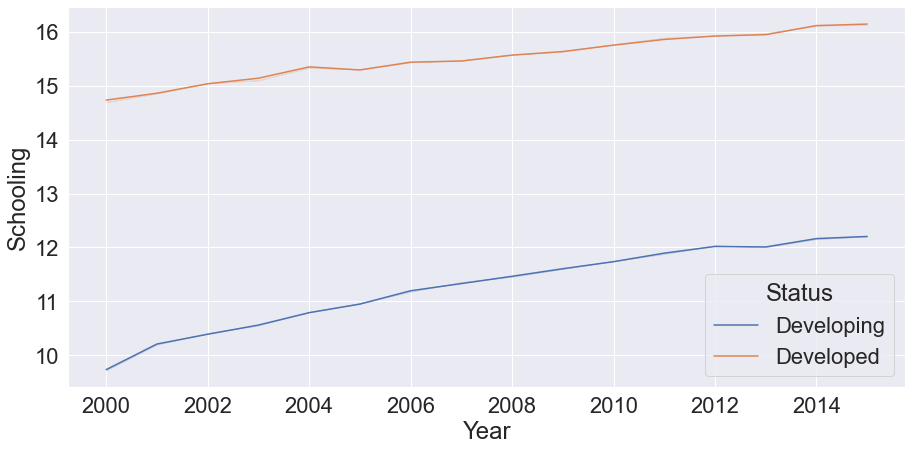

In [32]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Schooling',hue='Status',ci=0,
             data=df);

* Schooling years of citizens in both developed and developing countries have increased over the years

#### Year vs Schooling vs Continent

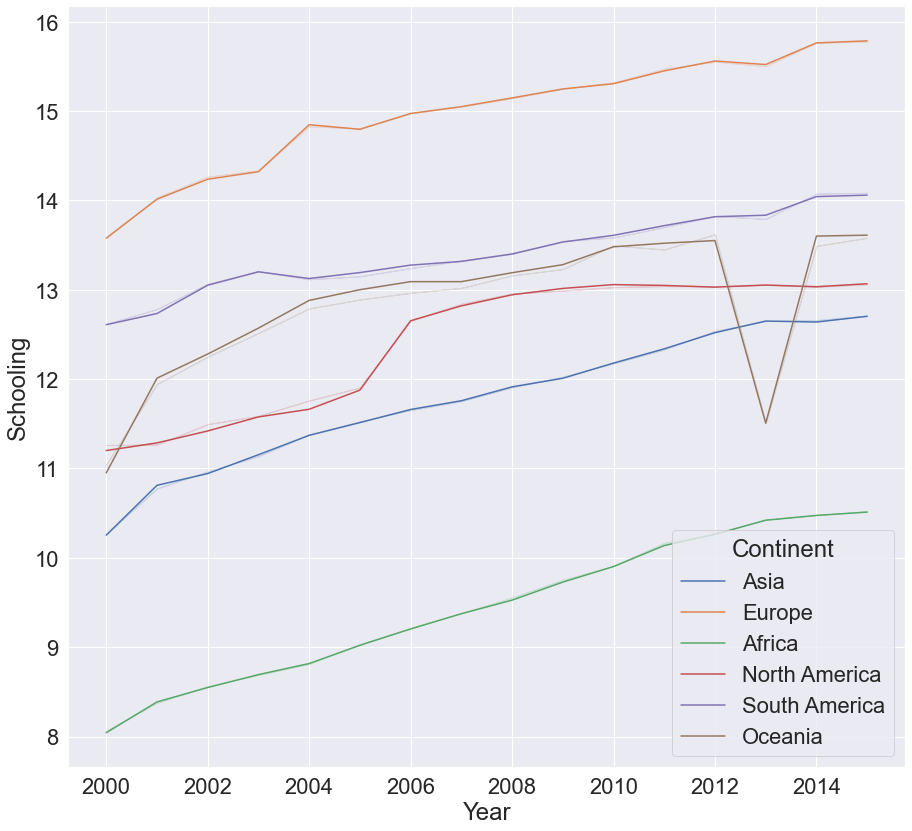

In [33]:
plt.figure(figsize=(15,14))
sns.lineplot(x='Year', y='Schooling',hue='Continent',ci=0,
             data=df);

* In all continents , Schooling years has been increasing over the years
* The Oceania countries have witnessed sudden downfall and increase in schooling years from 2012 to 2014 which can be explored further
* Increase in schooling years in African countries has been more than other continents

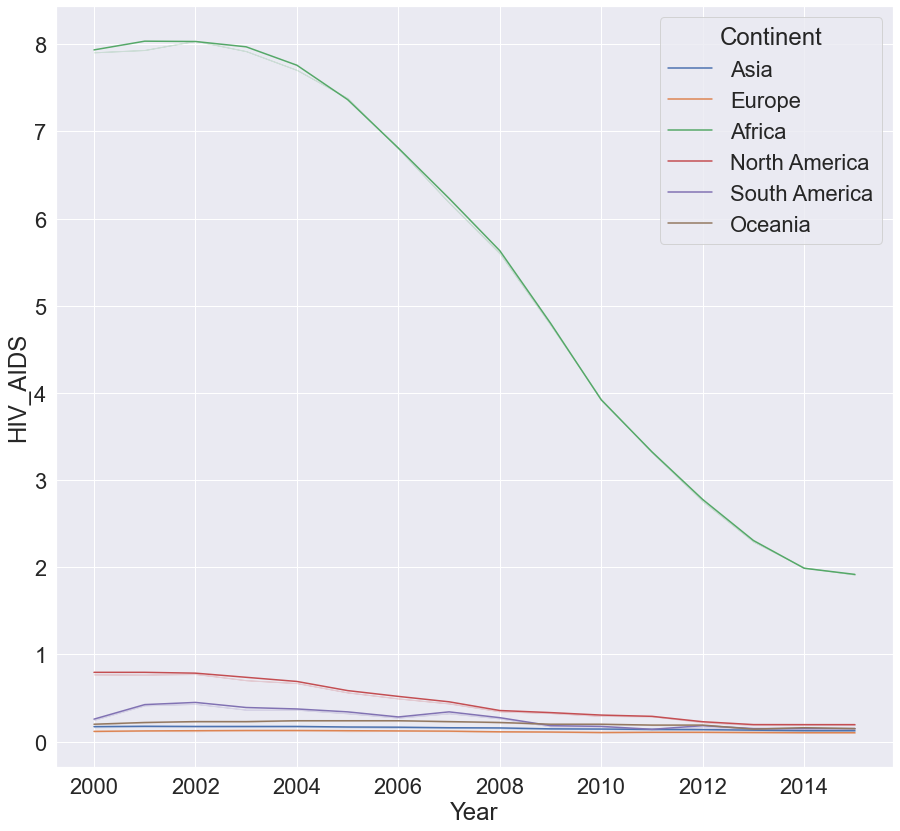

In [34]:
plt.figure(figsize=(15,14))
sns.lineplot(x='Year', y='HIV_AIDS',hue='Continent',ci=0,
             data=df);

* There is sharp decline in HIV Aids deaths in African countries

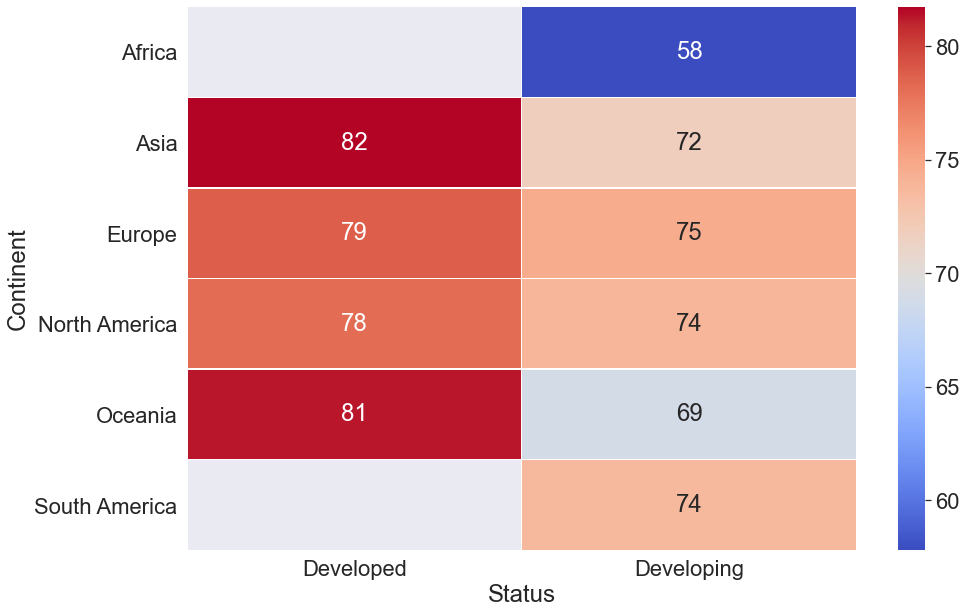

In [35]:
df_hm =df.pivot_table(index = 'Continent',columns ='Status',values ="Life_expectancy",aggfunc=np.median)
# Draw a heatmap 
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_hm,   cmap='coolwarm',linewidths=.5, annot=True, ax=ax);

**Observation**

- Developed countries from Asia has higher life expectancy than developed countries from Europe and North America


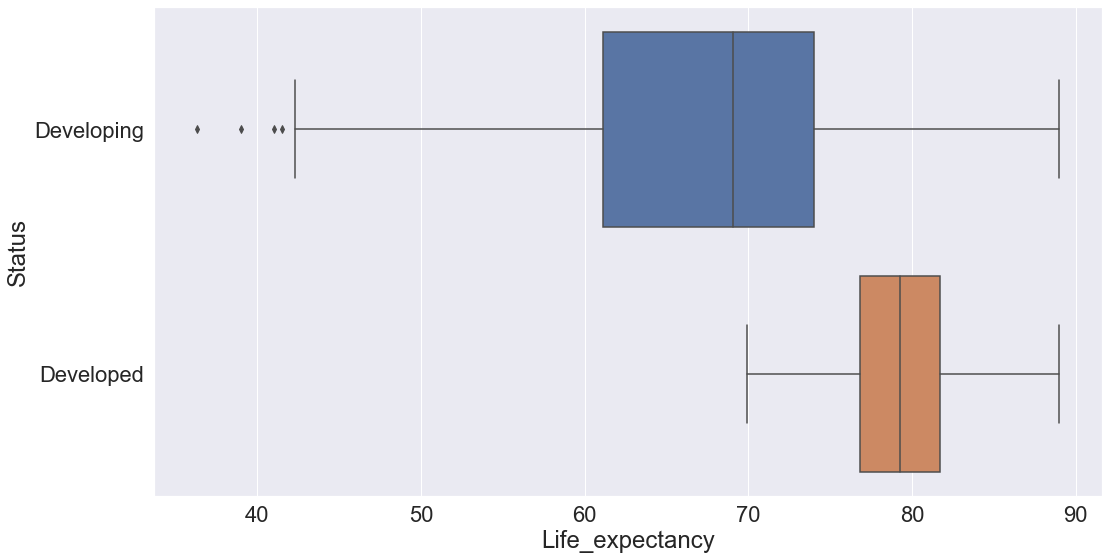

In [36]:
plt.figure(figsize=(17,9))
sns.boxplot(y='Status',x="Life_expectancy",data=df)
plt.show()

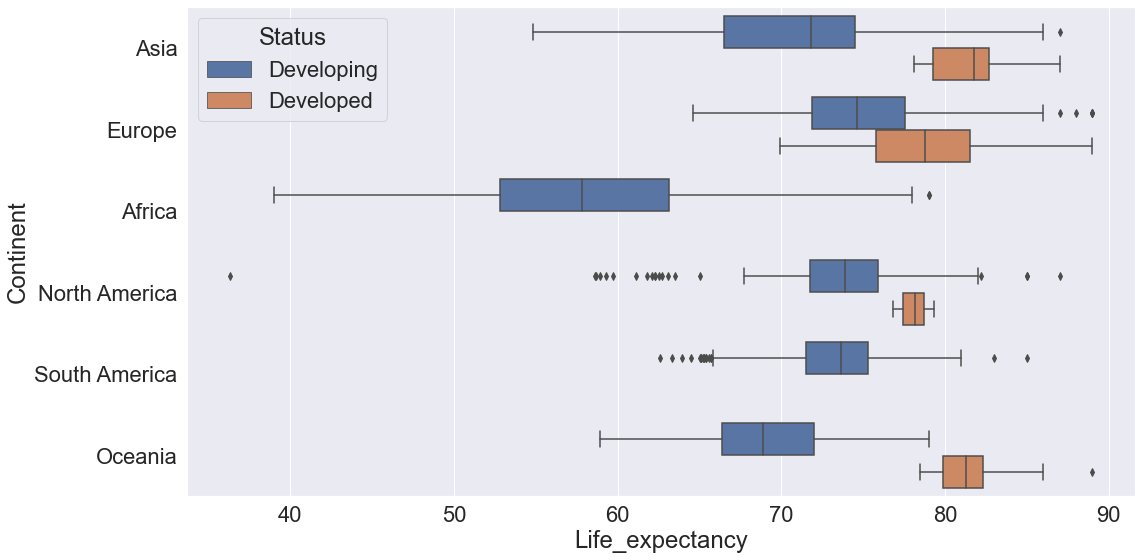

In [37]:
plt.figure(figsize=(17,9))
sns.boxplot(y="Continent",x="Life_expectancy",data=df,hue='Status')
plt.show()

**Observation**

- The life expectancy in the developed countries is much higher than the developing countries.
- The median value of life expectancy (approximately as can be seen from the boxplot) for:
     - Developing: 69 years
     - Developed: 78 years
- Asian developed countries have life expectancy higher than European and north American developed countries

In [38]:
# Converting object type column to category type
df['Country'] = df['Country'].astype('category')
df['Status'] = df['Status'].astype('category')
df['Continent'] = df['Continent'].astype('category')

In [39]:
# treat outliers by flooring and capping

def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [40]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

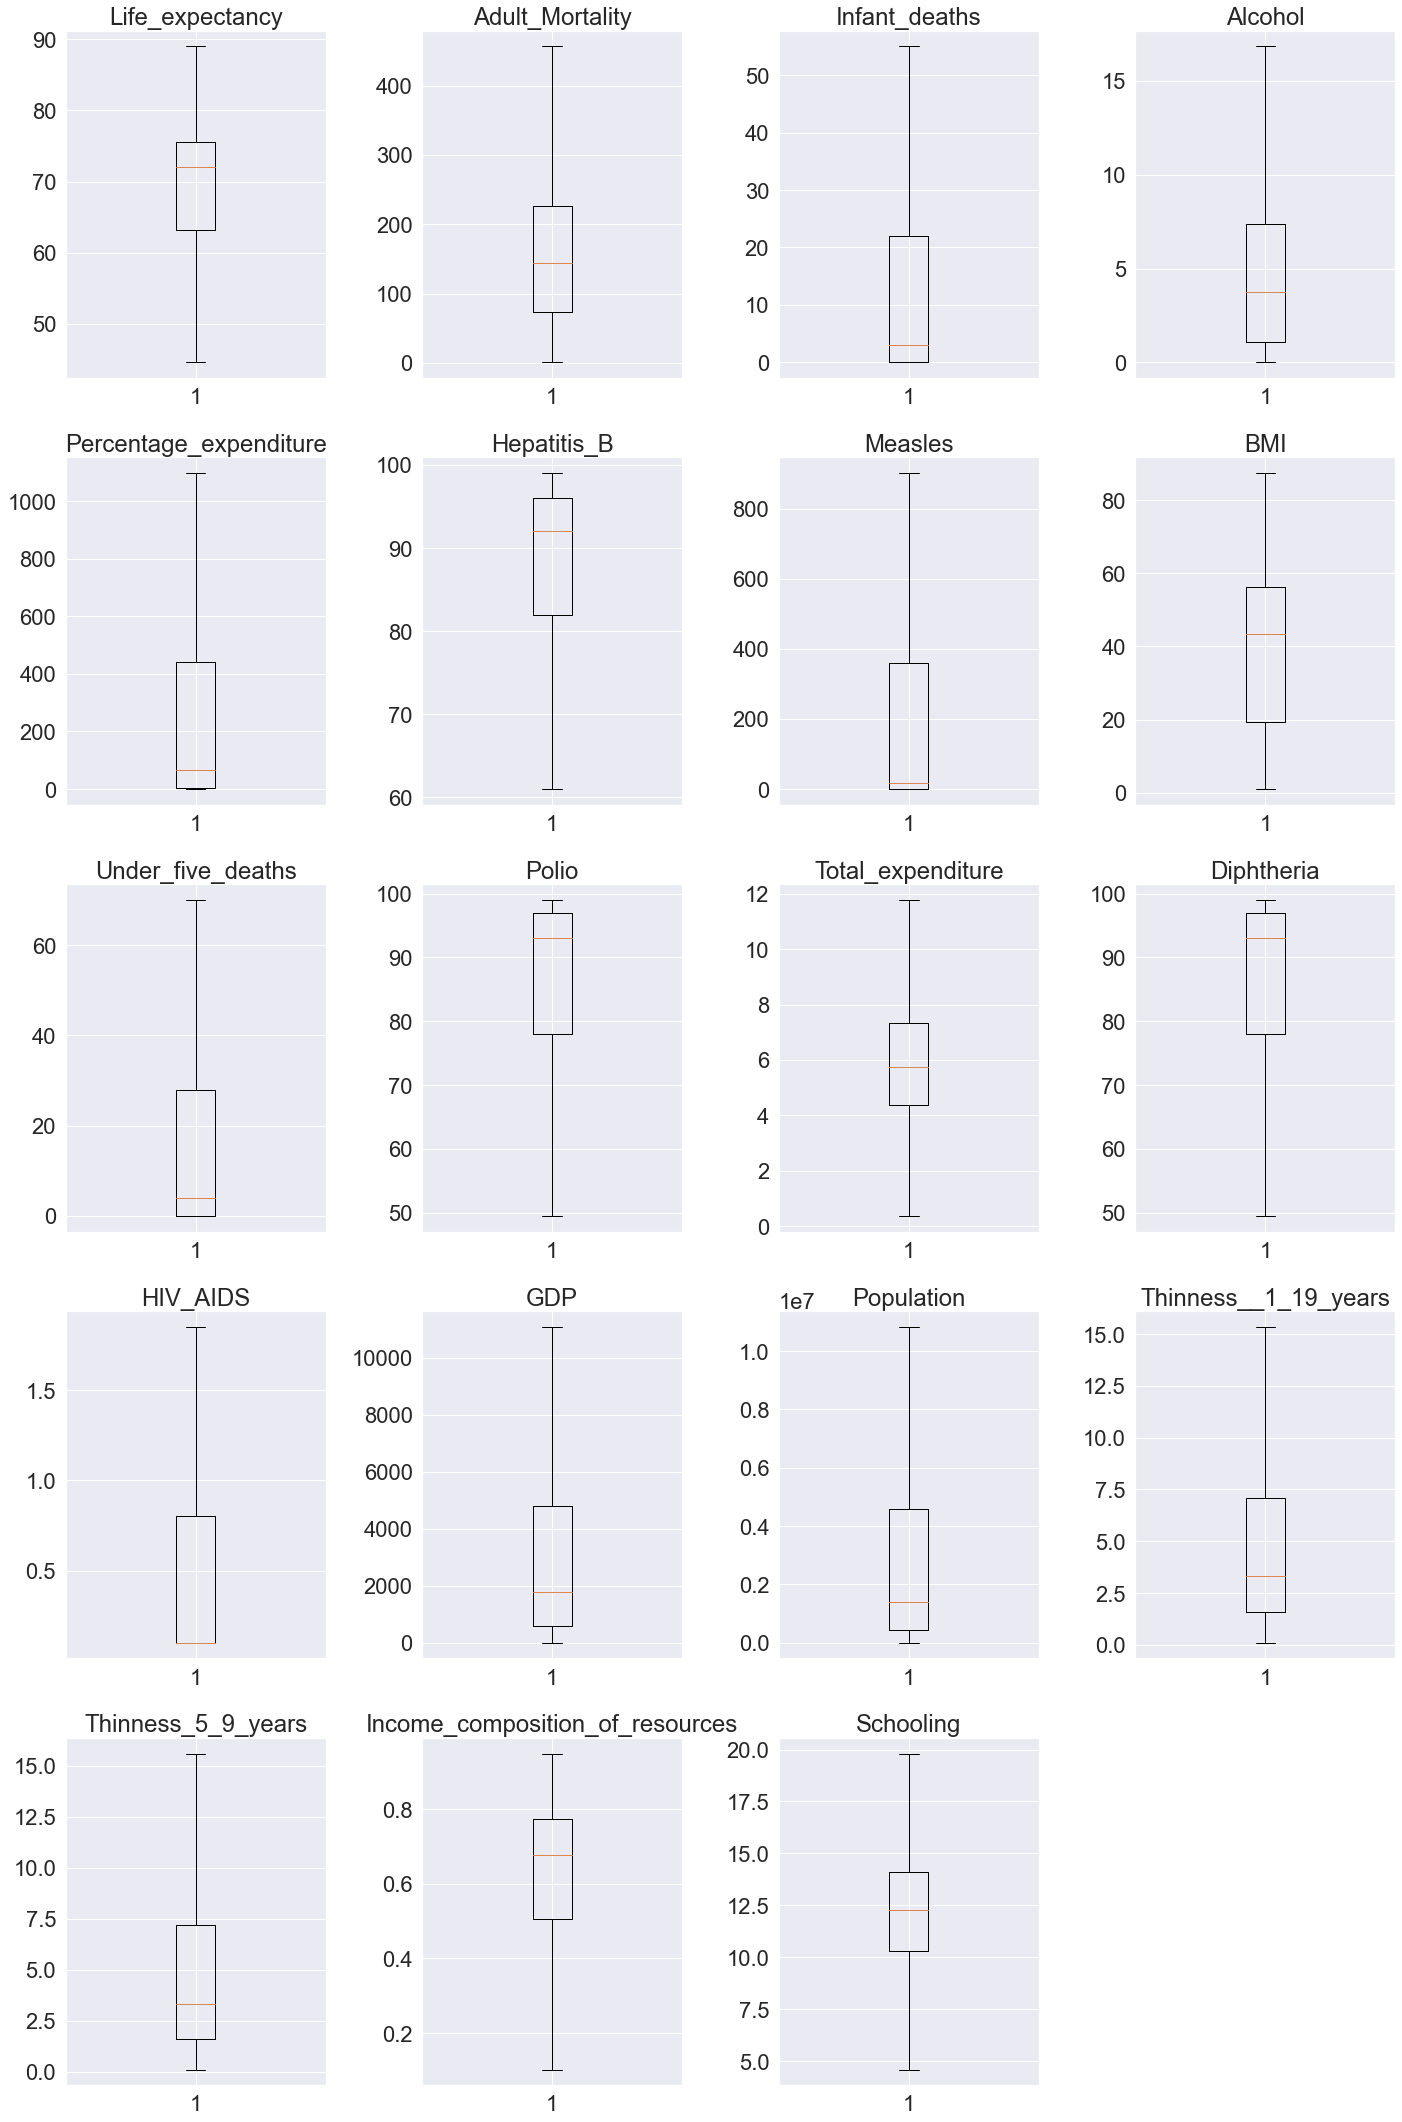

In [41]:
# check box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [42]:
#Defining X and y variables

X = df.drop(['Life_expectancy','Country'], axis=1)
y = df[['Life_expectancy']]

In [43]:
print(X.shape)
print(y.shape)

(2938, 21)
(2938, 1)


In [44]:
# categorical data encoding
X = pd.get_dummies(X, columns=['Continent', 'Status'], drop_first=True)
X.head()

Year  Adult_Mortality  Infant_deaths  Alcohol  Percentage_expenditure  \
0  2015          263.000             55    0.010                  71.280   
1  2014          271.000             55    0.010                  73.524   
2  2013          268.000             55    0.010                  73.219   
3  2012          272.000             55    0.010                  78.184   
4  2011          275.000             55    0.010                   7.097   

   Hepatitis_B  Measles    BMI  Under_five_deaths  Polio  ...  \
0       65.000  900.625 19.100                 70 49.500  ...   
1       62.000  492.000 18.600                 70 58.000  ...   
2       64.000  430.000 18.100                 70 62.000  ...   
3       67.000  900.625 17.600                 70 67.000  ...   
4       68.000  900.625 17.200                 70 68.000  ...   

   Thinness__1_19_years  Thinness_5_9_years  Income_composition_of_resources  \
0                15.350              15.600                            0.479   
1                15.350              15.600                            0.476   
2                15.350              15.600                            0.470   
3                15.350              15.600                            0.463   
4                15.350              15.600                            0.454   

   Schooling  Continent_Asia  Continent_Europe  Continent_North America  \
0     10.100               1                 0                        0   
1     10.000               1                 0                        0   
2      9.900               1                 0                        0   
3      9.800               1                 0                        0   
4      9.500               1                 0                        0   

   Continent_Oceania  Continent_South America  Status_Developing  
0                  0                        0                  1  
1                  0                        0                  1  
2                  0                        0                  1  
3                  0                        0                  1  
4                  0                        0                  1  

[5 rows x 25 columns]

In [45]:
#split the data into train and test
from sklearn.model_selection import train_test_split

In [46]:
# build linear regression model using statsmodel 
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     502.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:03:43   Log-Likelihood:                -5499.2
No. Observations:                2056   AIC:                         1.105e+04
Df Residuals:                    2030   BIC:                         1.120e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [47]:
# check prediction using k-fold validation

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.846 (+/- 0.024)
Mean Squared Error: 13.469 (+/- 2.247)


In [48]:
# Removing Multicollinearity, till all VIF is low

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],index=X_train.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                             226144.186
Year                                   1.203
Adult_Mortality                        1.799
Infant_deaths                        116.337
Alcohol                                2.495
Percentage_expenditure                 3.721
Hepatitis_B                            1.541
Measles                                1.733
BMI                                    1.967
Under_five_deaths                    122.905
Polio                                  3.891
Total_expenditure                      1.246
Diphtheria                             4.108
HIV_AIDS                               3.176
GDP                                    4.144
Population                             1.239
Thinness__1_19_years                   9.072
Thinness_5_9_years                     9.519
Income_composition_of_resources        3.767
Schooling                              4.412
Continent_Asia                         3.023
Continent_Europe    

In [49]:
# Drop the one with the highest vif values and check the Adjusted-R Squared
X_train2 = X_train.drop('Under_five_deaths', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                             226041.751
Year                                   1.203
Adult_Mortality                        1.798
Infant_deaths                          2.349
Alcohol                                2.493
Percentage_expenditure                 3.716
Hepatitis_B                            1.539
Measles                                1.733
BMI                                    1.954
Polio                                  3.876
Total_expenditure                      1.246
Diphtheria                             4.107
HIV_AIDS                               3.112
GDP                                    4.141
Population                             1.239
Thinness__1_19_years                   9.072
Thinness_5_9_years                     9.517
Income_composition_of_resources        3.748
Schooling                              4.395
Continent_Asia                         2.965
Continent_Europe                       4.652
Continent_North Amer

In [50]:
olsmod2 = sm.OLS(y_train, X_train2)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     509.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:03:43   Log-Likelihood:                -5523.3
No. Observations:                2056   AIC:                         1.110e+04
Df Residuals:                    2031   BIC:                         1.124e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [51]:
#Fitting linear model

cv_Score21 = cross_val_score(linearregression, X_train2, y_train, cv = 10)
cv_Score22 = cross_val_score(linearregression, X_train2, y_train, cv = 10, scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score21.mean(), cv_Score21.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score22.mean(), cv_Score22.std() * 2))

RSquared: 0.851 (+/- 0.026)
Mean Squared Error: 13.008 (+/- 2.758)


In [52]:
# drop the variable 'Total expenditue', since it has highest p value among all with p value greater than 0.05
X_train3 = X_train2.drop(['Total_expenditure'], axis=1)

In [53]:
olsmod3 = sm.OLS(y_train, X_train3)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     531.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:03:44   Log-Likelihood:                -5523.4
No. Observations:                2056   AIC:                         1.109e+04
Df Residuals:                    2032   BIC:                         1.123e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [54]:
# Now Thinness__1_19_years has highest p value among all variables with p value greater than 0.05, so we'll drop that
X_train4 = X_train3.drop(['Thinness__1_19_years'], axis=1)

In [55]:
olsmod4 = sm.OLS(y_train, X_train4)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     556.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:03:44   Log-Likelihood:                -5523.5
No. Observations:                2056   AIC:                         1.109e+04
Df Residuals:                    2033   BIC:                         1.122e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [56]:
# Now we see that 'BMI' has highest p value among all variables with p value greater than 0.05, so we'll drop that
X_train5 = X_train4.drop(['BMI'], axis=1)

In [57]:
olsmod5 = sm.OLS(y_train, X_train5)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     582.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:03:44   Log-Likelihood:                -5523.7
No. Observations:                2056   AIC:                         1.109e+04
Df Residuals:                    2034   BIC:                         1.122e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

* Now we see that 'Continent_oceania' has highest p value among all variables with p value greater than 0.05, but we will not remove that because it is from a categorical variables and there are other levels of this category that are significant.

* Let's drop 'Measles' because it has highest p value among all variables with p value greater than 0.05, so we'll drop that. 

In [58]:
X_train6 = X_train5.drop(['Measles'], axis=1)

In [59]:
olsmod6 = sm.OLS(y_train, X_train6)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     611.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:03:44   Log-Likelihood:                -5523.9
No. Observations:                2056   AIC:                         1.109e+04
Df Residuals:                    2035   BIC:                         1.121e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

* Now we see that 'GDP' has highest p value among all variables with p value greater than 0.05, so we'll drop that. 

In [60]:
X_train7 = X_train6.drop(['GDP'], axis=1)

In [61]:
olsmod7 = sm.OLS(y_train, X_train7)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     644.1
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:03:44   Log-Likelihood:                -5524.4
No. Observations:                2056   AIC:                         1.109e+04
Df Residuals:                    2036   BIC:                         1.120e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [62]:
#Fitting linear model

cv_Score71 = cross_val_score(linearregression, X_train7, y_train, cv = 10)
cv_Score72 = cross_val_score(linearregression, X_train7, y_train, cv = 10, scoring = 'neg_mean_squared_error')                                  

print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score72.mean(), cv_Score72.std() * 2))

Mean Squared Error: 12.952 (+/- 2.782)


#### Observations
* Now Adjusted R-squared is 0.857, Our model is able to explain 85.7% of variance that shows model is good.
* The Adjusted-R squared in the first model was 85.9% (Where we considered all the variables) this shows that the variables we dropped were not affecting the model much.
* The average MSE has further dropped in the latest model suggesting that we should consider this for prediction.



In [63]:
# let us check for multicollinearity again
# we drop the one with the highest vif values and check the Adjusted-R Squared

vif_series7 = pd.Series([variance_inflation_factor(X_train7.values,i) for i in range(X_train7.shape[1])],index=X_train7.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series7))

Series before feature selection: 

const                             216562.860
Year                                   1.152
Adult_Mortality                        1.788
Infant_deaths                          1.948
Alcohol                                2.459
Percentage_expenditure                 1.485
Hepatitis_B                            1.534
Polio                                  3.859
Diphtheria                             4.072
HIV_AIDS                               3.074
Population                             1.221
Thinness_5_9_years                     2.022
Income_composition_of_resources        3.631
Schooling                              4.300
Continent_Asia                         2.923
Continent_Europe                       4.513
Continent_North America                2.132
Continent_Oceania                      1.830
Continent_South America                1.809
Status_Developing                      2.316
dtype: float64



**No features with VIF>5** 

In [64]:
residual= olsres7.resid
np.mean(residual)

2.737513458459448e-11

* Mean of redisuals is very close to 0.

In [65]:
residual=olsres7.resid
fitted=olsres7.fittedvalues #predicted values

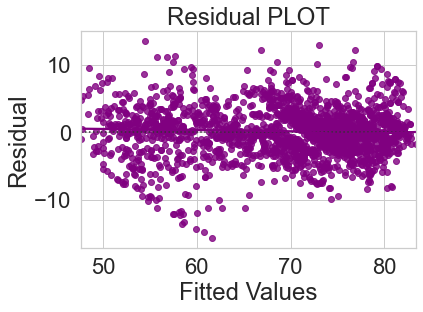

In [66]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects.
No pattern in residual hence 1st assumptions is satisfied

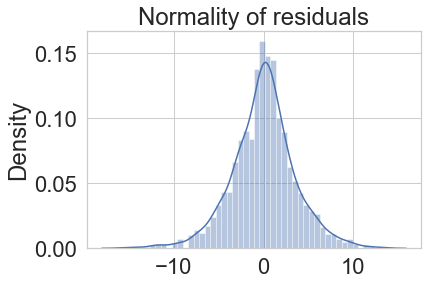

In [67]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

Null hypothesis : Residuals are homoskedastic

Alternate hypothesis : Residuals have hetroskedasticity

In [68]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train7)
lzip(name, test)

[('F statistic', 1.0738576628332315), ('p-value', 0.12907448448224684)]

Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

In [69]:
# Now we have checked all the assumptions and they are satisfied, so we can move towards prediction part¶
X_train7.drop(columns= ['const'], inplace = True)

X_test = X_test[X_train7.columns]

linearregression.fit(X_train7, y_train)

LinearRegression()

In [70]:
# Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error

r_squared_train = linearregression.score(X_train7, y_train)
r_squared_test = linearregression.score(X_test, y_test)

mean_absolute_error_train = mean_absolute_error(y_train, linearregression.predict(X_train7))
mean_absolute_error_test = mean_absolute_error(y_test, linearregression.predict(X_test))


mean_squared_error_train = mean_squared_error(y_train, linearregression.predict(X_train7))
mean_squared_error_test = mean_squared_error(y_test, linearregression.predict(X_test))


In [71]:
#MAE
print('Train MAE:', mean_absolute_error_train)
print('Test MAE:', mean_absolute_error_test)

Train MAE: 2.630283412979306
Test MAE: 2.585873611206068


In [72]:
# RMSE
print('Train RMSE:', mean_squared_error_train**0.5)
print('Test RMSE:', mean_squared_error_test**0.5)

Train RMSE: 3.5537558346342766
Test RMSE: 3.4598625957879343


In [73]:
# R2 Squared
print('Train R Squared:', r_squared_train)
print('Test R Squared:', r_squared_test)

Train R Squared: 0.8573568625293554
Test R Squared: 0.8709069803732736


In [74]:
#printing all the coeffs
linearregression.coef_

array([[ 1.10592103e-01, -1.46624750e-02, -5.58503430e-02,
        -9.70200404e-02,  1.66943137e-03, -3.53229544e-02,
         2.78166378e-02,  3.90486532e-02, -4.52619796e+00,
         5.48214505e-08, -8.86000865e-02,  7.62517136e+00,
         2.74051444e-01,  1.74921809e+00,  1.92681619e+00,
         4.51061245e+00,  4.66670871e-01,  2.67059864e+00,
        -2.92638260e+00]])

In [75]:
#printing the intercept
linearregression.intercept_

array([-156.9163136])

# Appendix:


- **warnings.filterwarnings("ignore")** : Never print matching warnings.

- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **Numpy** : The fundamental package for scientific computing with Python.

- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **pairplot** : Plot pairwise relationships in a dataset.

- **boxplot** : Draw a box plot to show distributions with respect to categories.

- **distplot** : Flexibly plot a univariate distribution of observations.

- **pandas.DataFrame.corr** : Compute pairwise correlation of columns, excluding NA/null values.

- **sklearn.linear_model.LinearRegression** : Ordinary least squares Linear Regression.

- **scipy.stats** : This module contains a large number of probability distributions as well as a growing library of statistical functions.

- **statsmodels** : It is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
    - An extensive list of result statistics are available for each estimator.
    - The results are tested against existing statistical packages to ensure that they are correct.
    - The online documentation is hosted at [statsmodels.org](https://www.statsmodels.org/stable/index.html).